# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
apiKey = 'bc11b973147bbc65a048eb4b1cdf6fd3'

url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bc11b973147bbc65a048eb4b1cdf6fd3&q=New York'

#+ apiKey +'&q=New York'



cityWthr=requests.get(url).json()

cityWthr


{'coord': {'lon': -73.99, 'lat': 40.73},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'},
  {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'},
  {'id': 300,
   'main': 'Drizzle',
   'description': 'light intensity drizzle',
   'icon': '09d'}],
 'base': 'stations',
 'main': {'temp': 73.17,
  'pressure': 1005,
  'humidity': 93,
  'temp_min': 71.96,
  'temp_max': 75.02},
 'visibility': 12874,
 'wind': {'speed': 3.36},
 'rain': {'1h': 1.43},
 'clouds': {'all': 90},
 'dt': 1539276960,
 'sys': {'type': 1,
  'id': 2121,
  'message': 0.0609,
  'country': 'US',
  'sunrise': 1539255817,
  'sunset': 1539296441},
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
(cityWthr['weather'][0])

{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}

In [5]:
apiKey = 'bc11b973147bbc65a048eb4b1cdf6fd3'

url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + apiKey


cityData =[]

lineCt =1

batchCt=1

for i, city in enumerate(cities):

    if(i%50==0 and i>=50):
        batchCt +=1
        lineCt =0
    
    cityURL = url +'&q=' + city
    
    print( (lineCt, batchCt, city))
    
    lineCt +=1
    
    try:
        cityWthr=requests.get(cityURL).json()
        
        cityLat = cityWthr['coord']['lat']
        cityLng =cityWthr['coord']['lon']
        cityMxTmp= cityWthr['main']['temp_max']  #where is this pulling from?
        cityHmdty= cityWthr['main']['humidity']
        cityCloud=cityWthr['clouds']['all']
        cityWind=cityWthr['wind']['speed']
        ctryOfCity=cityWthr['sys']['country']
        cityDt=cityWthr['dt']
        
        
        cityData.append({'City': city,
                         'Lat': cityLat,
                         'Lng': cityLng,
                         'Max Temp': cityMxTmp,
                         'Humidity': cityHmdty,
                         'Cloudiness':cityCloud,
                         'Wind Speed': cityWind,
                         'Country': ctryOfCity,
                         'Date': cityDt})
        
    except:
        print('City not found. Skipping...')
        pass
    
    
print('--------------------------------------------')
        
        
        
        
        
        
    

(1, 1, 'bengkulu')
City not found. Skipping...
(2, 1, 'busselton')
(3, 1, 'bokoro')
City not found. Skipping...
(4, 1, 'los llanos de aridane')
(5, 1, 'tura')
(6, 1, 'kuopio')
(7, 1, 'cape town')
(8, 1, 'ahipara')
(9, 1, 'mastic beach')
(10, 1, 'te anau')
(11, 1, 'jamestown')
(12, 1, 'vaini')
(13, 1, 'hobart')
(14, 1, 'albany')
(15, 1, 'vigrestad')
(16, 1, 'flagstaff')
(17, 1, 'mataura')
(18, 1, 'mar del plata')
(19, 1, 'bredasdorp')
(20, 1, 'ushuaia')
(21, 1, 'bathsheba')
(22, 1, 'bambous virieux')
(23, 1, 'chuy')
(24, 1, 'tilichiki')
(25, 1, 'carnarvon')
(26, 1, 'esperance')
(27, 1, 'norman wells')
(28, 1, 'genhe')
(29, 1, 'antalya')
(30, 1, 'saint-philippe')
(31, 1, 'ruatoria')
City not found. Skipping...
(32, 1, 'taolanaro')
City not found. Skipping...
(33, 1, 'waingapu')
(34, 1, 'mehamn')
(35, 1, 'hermanus')
(36, 1, 'acarau')
City not found. Skipping...
(37, 1, 'soe')
(38, 1, 'weinan')
(39, 1, 'orotukan')
(40, 1, 'rikitea')
(41, 1, 'cherskiy')
(42, 1, 'atuona')
(43, 1, 'chama')
(4

(46, 7, 'thoen')
(47, 7, 'bagn')
(48, 7, 'tunceli')
(49, 7, 'tarakan')
(0, 8, 'charters towers')
(1, 8, 'mnogovershinnyy')
(2, 8, 'aksehir')
(3, 8, 'hovd')
(4, 8, 'ningan')
City not found. Skipping...
(5, 8, 'kruisfontein')
(6, 8, 'savannah bight')
(7, 8, 'vallenar')
(8, 8, 'goderich')
(9, 8, 'grand-lahou')
(10, 8, 'korla')
City not found. Skipping...
(11, 8, 'maridi')
City not found. Skipping...
(12, 8, 'mount isa')
(13, 8, 'shangrao')
(14, 8, 'talnakh')
(15, 8, 'aurangabad')
(16, 8, 'antsohihy')
(17, 8, 'maracacume')
(18, 8, 'marzuq')
(19, 8, 'eyl')
(20, 8, 'oussouye')
(21, 8, 'sambava')
(22, 8, 'olafsvik')
City not found. Skipping...
(23, 8, 'tokur')
(24, 8, 'coruripe')
(25, 8, 'finschhafen')
(26, 8, 'umzimvubu')
City not found. Skipping...
(27, 8, 'ayagoz')
(28, 8, 'katherine')
(29, 8, 'edd')
(30, 8, 'kidal')
(31, 8, 'chicama')
(32, 8, 'guarapari')
(33, 8, 'palmer')
(34, 8, 'lufilufi')
(35, 8, 'eskasem')
City not found. Skipping...
(36, 8, 'high rock')
(37, 8, 'grindavik')
(38, 8, 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#assigns each element to an incrementing value 
for i, city in enumerate(cities):
    print(i,city)

0 bengkulu
1 busselton
2 bokoro
3 los llanos de aridane
4 tura
5 kuopio
6 cape town
7 ahipara
8 mastic beach
9 te anau
10 jamestown
11 vaini
12 hobart
13 albany
14 vigrestad
15 flagstaff
16 mataura
17 mar del plata
18 bredasdorp
19 ushuaia
20 bathsheba
21 bambous virieux
22 chuy
23 tilichiki
24 carnarvon
25 esperance
26 norman wells
27 genhe
28 antalya
29 saint-philippe
30 ruatoria
31 taolanaro
32 waingapu
33 mehamn
34 hermanus
35 acarau
36 soe
37 weinan
38 orotukan
39 rikitea
40 cherskiy
41 atuona
42 chama
43 kawalu
44 lagoa
45 kapaa
46 aflu
47 svetlyy
48 cam ranh
49 nikolskoye
50 sao filipe
51 punta arenas
52 butaritari
53 sinnamary
54 sitka
55 pine bluff
56 coquimbo
57 iztapa
58 chincha alta
59 chokurdakh
60 hanzhong
61 hilo
62 bardiyah
63 tommot
64 nanortalik
65 illoqqortoormiut
66 salalah
67 pisco
68 phalaborwa
69 komsomolskiy
70 isangel
71 nguiu
72 urumqi
73 vila do maio
74 tautira
75 new norfolk
76 nelson bay
77 bluff
78 whitecourt
79 okha
80 georgetown
81 castro
82 jiayuguan
83

In [7]:
# a list of dictionaries
cityData

[{'City': 'busselton',
  'Lat': -33.64,
  'Lng': 115.35,
  'Max Temp': 61.32,
  'Humidity': 100,
  'Cloudiness': 8,
  'Wind Speed': 11.1,
  'Country': 'AU',
  'Date': 1539278911},
 {'City': 'los llanos de aridane',
  'Lat': 28.66,
  'Lng': -17.92,
  'Max Temp': 77,
  'Humidity': 73,
  'Cloudiness': 20,
  'Wind Speed': 4.7,
  'Country': 'ES',
  'Date': 1539277200},
 {'City': 'tura',
  'Lat': 25.52,
  'Lng': 90.21,
  'Max Temp': 71.04,
  'Humidity': 99,
  'Cloudiness': 92,
  'Wind Speed': 1.7,
  'Country': 'IN',
  'Date': 1539278912},
 {'City': 'kuopio',
  'Lat': 62.89,
  'Lng': 27.68,
  'Max Temp': 48.2,
  'Humidity': 93,
  'Cloudiness': 90,
  'Wind Speed': 5.82,
  'Country': 'FI',
  'Date': 1539276600},
 {'City': 'cape town',
  'Lat': -33.93,
  'Lng': 18.42,
  'Max Temp': 59,
  'Humidity': 77,
  'Cloudiness': 20,
  'Wind Speed': 9.17,
  'Country': 'ZA',
  'Date': 1539277200},
 {'City': 'ahipara',
  'Lat': -35.17,
  'Lng': 173.16,
  'Max Temp': 56.46,
  'Humidity': 92,
  'Cloudiness': 9

In [8]:
cityDataDf=pd.DataFrame(cityData)

cityDataDf.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,8,AU,1539278911,100,-33.64,115.35,61.32,11.10
1,los llanos de aridane,20,ES,1539277200,73,28.66,-17.92,77.00,4.70
2,tura,92,IN,1539278912,99,25.52,90.21,71.04,1.70
3,kuopio,90,FI,1539276600,93,62.89,27.68,48.20,5.82
4,cape town,20,ZA,1539277200,77,-33.93,18.42,59.00,9.17


In [9]:
#splash the Df to a txt file somewhere

cityDataDf.to_csv(output_data_file, index_label='LocID')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

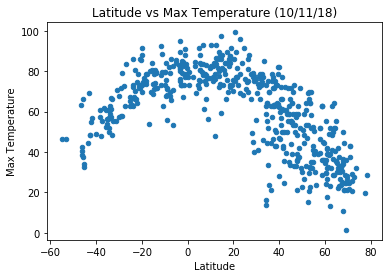

In [10]:
cityDataDf.plot(kind='scatter',x='Lat',y='Max Temp')

plt.title('Latitude vs Max Temperature (%s)'% time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

plt.savefig("fig1.png")
plt.show()



#### Latitude vs. Humidity Plot 

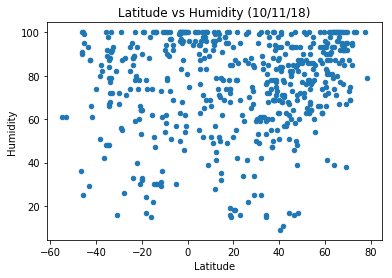

In [11]:
cityDataDf.plot(kind='scatter',x='Lat',y='Humidity')

plt.title('Latitude vs Humidity (%s)'% time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("fig2.png")
plt.show()


#### Latitude vs. Cloudiness Plot

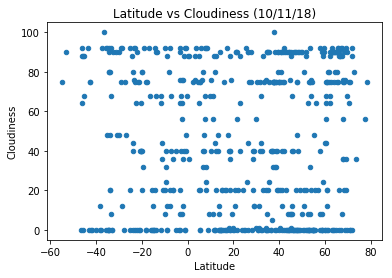

In [12]:
cityDataDf.plot(kind='scatter',x='Lat',y='Cloudiness')

plt.title('Latitude vs Cloudiness (%s)'% time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("fig3.png")
plt.show()


#### Latitude vs. Wind Speed Plot

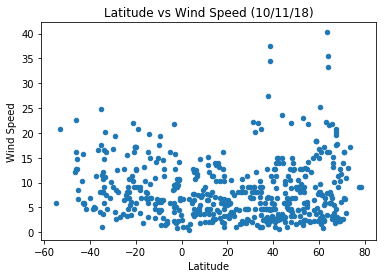

In [13]:
cityDataDf.plot(kind='scatter',x='Lat',y='Wind Speed')

plt.title('Latitude vs Wind Speed (%s)'% time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.savefig("fig4.png")
plt.show()